## Ploting

In [1]:
import algotrade
import ta
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as yf

import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
algotrade.general.getStrategies()

['ABC',
 'ChandelierExitRSI',
 'ExponentialMovingAverage',
 'Ichimoku',
 'MACD',
 'RSI',
 'RSI_MACD',
 'SMA200',
 'Strategy',
 'StrategySimple',
 'WeightedMovingAverage',
 'applyStrategiesIchimoku']

In [3]:
TICKER = 'AMD'

In [4]:
df = yf.get_data(ticker=TICKER, start_date='2012-01-01')[:-1]
df = df.round(2)
df

,open,high,low,close,adjclose,volume,ticker
2012-01-03,5.53,5.59,5.44,5.48,5.48,12675100,AMD
2012-01-04,5.47,5.49,5.41,5.46,5.46,8034900,AMD
2012-01-05,5.45,5.57,5.35,5.46,5.46,11476900,AMD
2012-01-06,5.44,5.52,5.39,5.43,5.43,12938600,AMD
2012-01-09,5.42,5.60,5.38,5.59,5.59,12585400,AMD
...,...,...,...,...,...,...,...
2022-03-22,115.43,117.95,113.81,114.78,114.78,101672600,AMD
2022-03-23,114.29,117.55,112.21,113.92,113.92,90579200,AMD
2022-03-24,114.96,120.55,113.71,120.53,120.53,121961300,AMD
2022-03-25,119.92,121.40,117.25,119.67,119.67,95806000,AMD


In [5]:
heikin_ashi = algotrade.calculations.HeikinAshi(df)
new_df = df.copy()
new_df['open'] = heikin_ashi.open()
new_df['high'] = heikin_ashi.high()
new_df['low'] = heikin_ashi.low()
new_df['close'] = heikin_ashi.close()
new_df = new_df.round(decimals=2)
new_df

c:\PythonProjects\algotrade\algotrade\calculations.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  open = (open + self.val_close[i - 1]) / 2, 2


In [1]:
chand = algotrade.calculations.ChandelierExit(new_df)
new_df["exit_long"] = chand.exit_long()
new_df["exit_short"] = chand.exit_short()
new_df["exit_long_prev"] = chand.exit_long_prev()
new_df["exit_short_prev"] = chand.exit_short_prev()
new_df= new_df.round(2)
new_df.tail(25)

NameError: name 'algotrade' is not defined

In [18]:
signals = []
dir = 1

for i, row in new_df.iterrows():
    if row.close > row.exit_short_prev:
        dir = 1
    elif row.close < row.exit_long_prev:
        dir = -1
    else:
        dir = dir
    signals.append(dir)
signals

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1

In [19]:
buy_dates = []
sell_dates = []
new_df['signals'] = signals
prev = new_df['signals'][0]
for i, row in new_df.iterrows():
    if row.signals == 1 and prev == -1:
        buy_dates.append(row.name)
    elif row.signals == -1 and prev == 1:
        sell_dates.append(row.name)
    prev = row.signals 
buy_dates

[Timestamp('2012-08-08 00:00:00'),
 Timestamp('2013-02-11 00:00:00'),
 Timestamp('2014-03-07 00:00:00'),
 Timestamp('2015-03-02 00:00:00'),
 Timestamp('2015-09-11 00:00:00'),
 Timestamp('2016-04-22 00:00:00'),
 Timestamp('2016-11-16 00:00:00'),
 Timestamp('2016-12-06 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-05-16 00:00:00'),
 Timestamp('2017-11-06 00:00:00'),
 Timestamp('2018-01-03 00:00:00'),
 Timestamp('2018-12-03 00:00:00'),
 Timestamp('2019-05-28 00:00:00'),
 Timestamp('2019-08-08 00:00:00'),
 Timestamp('2020-03-24 00:00:00'),
 Timestamp('2021-02-08 00:00:00'),
 Timestamp('2021-05-28 00:00:00'),
 Timestamp('2021-10-13 00:00:00')]

In [20]:
# buy_dates = []
# sell_dates = []
# new_df['signals'] = signals
# new_df['buy'] = new_df['signals'] > new_df['signals'].shift(1)
# new_df['sell'] = new_df['signals'] < new_df['signals'].shift(1)
# new_df

In [21]:
# buy_dates = new_df['buy'].loc[new_df['buy']==True].index
# sell_dates = new_df['buy'].loc[new_df['sell']==True].index
# buy_dates

In [22]:
# plt.figure(figsize=(20,10))

# new_df['buy'] = new_df.close > new_df['exit_short_prev']
# new_df['sell'] = new_df.close < new_df['exit_long_prev']
# sns.scatterplot(x=new_df[-200:].index, y=new_df[-200:].close, hue=new_df['buy'][-200:])

In [23]:
def plot_candlestick(df, buy_dates=None, sell_dates=None):
    import plotly.graph_objects as go

    fig = go.Figure(data=[go.Candlestick(x=df.index,
                    open=df.open,
                    high=df.high,
                    low=df.low,
                    close=df.close, name='price')])

    fig.add_trace(go.Line(x=df.index, y=df['exit_short'], name='exit_short'))
    fig.add_trace(go.Line(x=df.index, y=df['exit_long'], name='exit_long'))

    scatter_buy = df.loc[buy_dates]
    scatter_sell = df.loc[sell_dates]

    fig.add_trace(go.Scatter(x=scatter_buy.index, y=scatter_buy.close*0.90, marker_symbol='arrow-up', mode='markers',marker=dict(
            size=5,
            line=dict(
                color='Green',
                width=5
            ))))
    fig.add_trace(go.Scatter(x=scatter_sell.index, y=scatter_sell.close*1.10, marker_symbol='arrow-down', mode='markers',marker=dict(
            size=5,
            line=dict(
                color='Red',
                width=5
            ))))


    fig.update_xaxes(
            rangeslider_visible=True,
            rangebreaks=[
                # NOTE: Below values are bound (not single values), ie. hide x to y
                dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
                # dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
                # dict(values=["2019-12-25", "2020-12-24"])  # hide holidays (Christmas and New Year's, etc)
            ]
        )
    
    fig.update_layout(autosize=True, height=800)

    return fig.show()
plot_candlestick(new_df, buy_dates, sell_dates)

In [24]:
sell_dates[-15:]

[Timestamp('2015-06-26 00:00:00'),
 Timestamp('2016-01-15 00:00:00'),
 Timestamp('2016-09-07 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-01-12 00:00:00'),
 Timestamp('2017-04-06 00:00:00'),
 Timestamp('2017-10-25 00:00:00'),
 Timestamp('2017-12-22 00:00:00'),
 Timestamp('2018-10-25 00:00:00'),
 Timestamp('2019-05-23 00:00:00'),
 Timestamp('2019-07-31 00:00:00'),
 Timestamp('2020-03-09 00:00:00'),
 Timestamp('2021-01-27 00:00:00'),
 Timestamp('2021-02-22 00:00:00'),
 Timestamp('2021-09-20 00:00:00')]

In [21]:
new_df[-100:-50]

,open,high,low,close,adjclose,volume,ticker,exit_long,exit_short,exit_short_prev,exit_long_prev,signals
2021-11-03,124.08,130.60,124.08,128.92,130.53,59537800,AMD,118.54,134.08,132.08,116.23,1
2021-11-04,126.50,139.00,126.50,134.82,137.50,84825200,AMD,118.54,136.14,134.08,118.54,1
2021-11-05,130.66,141.22,130.66,137.79,136.34,64920600,AMD,121.68,149.62,136.14,118.54,1
2021-11-08,134.22,153.60,134.22,144.79,150.16,141493800,AMD,121.68,150.20,149.62,121.68,1
2021-11-09,139.50,155.65,139.50,150.62,148.92,98442600,AMD,125.77,169.38,150.20,121.68,1
2021-11-10,145.06,146.30,138.52,142.16,139.87,82989200,AMD,125.77,160.90,169.38,125.77,1
2021-11-11,143.61,146.47,140.84,144.07,146.01,67934800,AMD,136.05,151.26,160.90,125.77,1
2021-11-12,143.84,148.59,143.84,146.69,147.89,52162100,AMD,139.80,151.26,151.26,136.05,1
2021-11-15,145.26,148.98,142.86,146.58,146.49,52271300,AMD,139.80,152.63,151.26,139.80,1
2021-11-16,145.92,153.08,145.34,149.20,152.45,53100800,AMD,138.76,154.18,152.63,139.80,1


In [25]:
# import matplotlib.ticker as plticker
# from matplotlib.axis import Axis

# loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
# Axis.set_major_locator(loc)

# plt.figure(figsize=(24, 10))
# plt.plot(df.index.map(str), df.close)


ticker = TSLA
start_date = 2012-01-01
strategy = <class 'algotrade.strategies.MACD'>
stats = {'profit_sum': 153.62609057759514, 'profit_mean': 2.7433230460284843, 'profit_median': 4.335179033366525, 'profit_win': 0.6964285714285714, 'num_trades': 56}
        


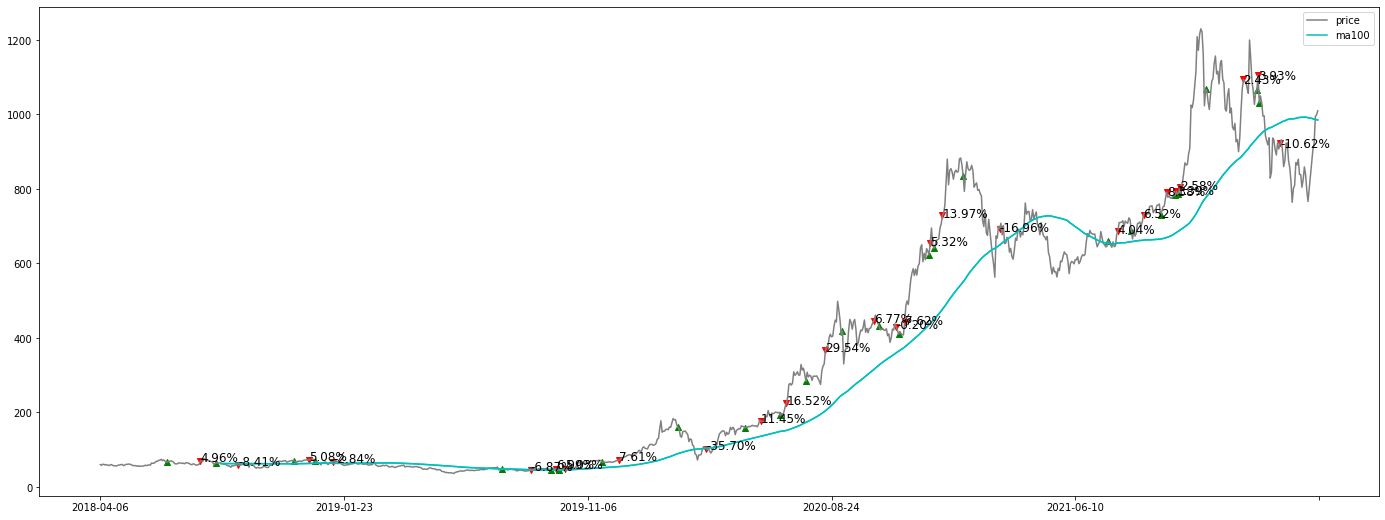

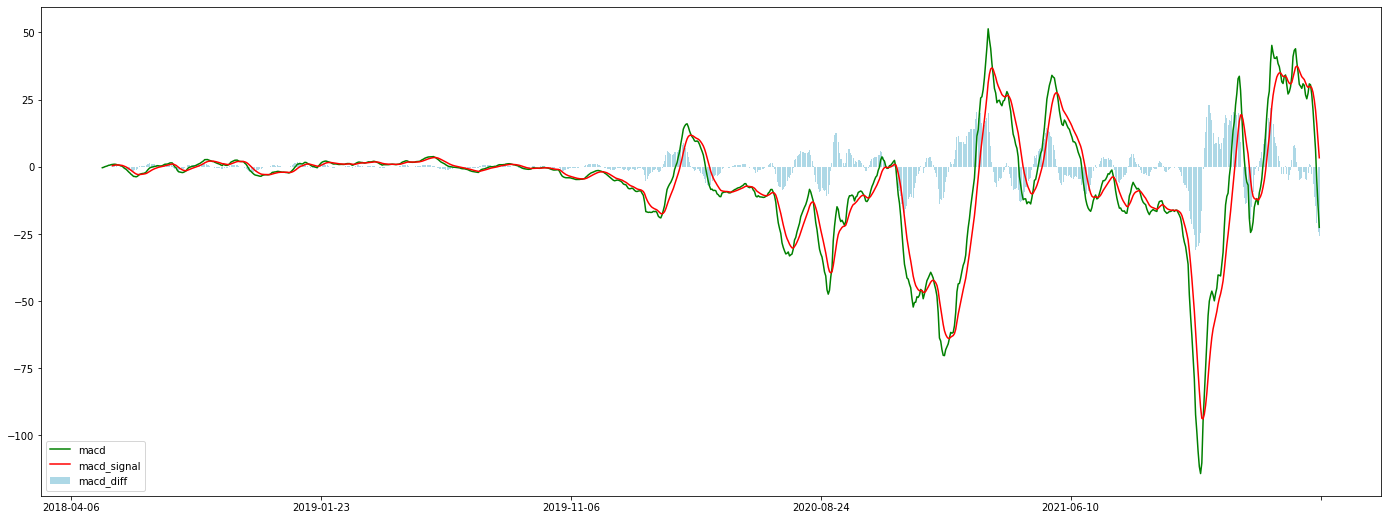

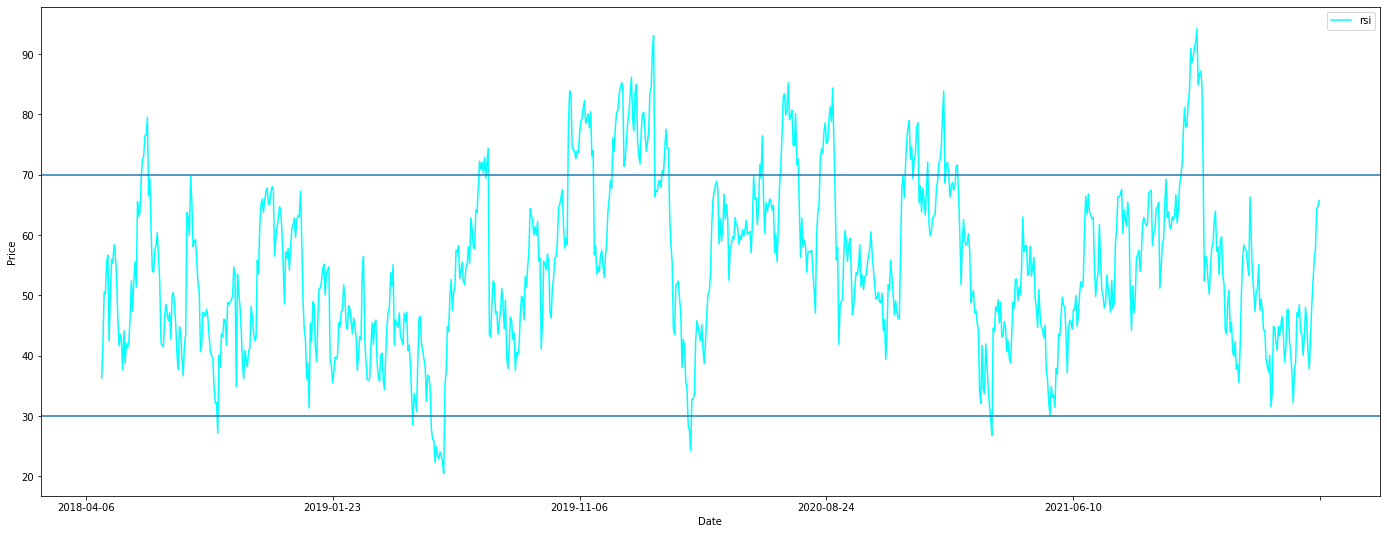

In [26]:
from algotrade.strategies import RSI, RSI_MACD, MACD

strat = MACD(sma=True)

test = algotrade.testing.TestStrategy(TICKER, strat, '2012-01-01', df=df, stop_loss=False, stop_loss_prc=3, take_profit=False, take_profit_prc=5)
print(test)
test.plotBuySell(days=1000, display_strategy=True)

In [27]:
(df.loc[test.sell_dates[-1]].close - df.loc[test.buy_dates[0]].close) / df.loc[test.buy_dates[0]].close * 100

13616.15565689744

In [6]:
test.buy_dates[-1]

Timestamp('2021-03-05 00:00:00')

In [ ]:
test.df.loc[test.df.index > "2021-08-01"].head(20)

In [ ]:
df['close'].plot()

In [ ]:
mas = [3, 9, 18]
for ma in mas:
    df[f'ma{ma}'] = ta.trend.sma_indicator(df.close, window=ma)

In [ ]:
class Graph:
    def __init__(self, cols, df):
        import matplotlib.pyplot as plt
        self.cols = cols
        self.df = df.copy()
        plt.figure(figsize=(24,10))
    
    def plot(self, days=500):
        df = self.df[-days:]
        plt.plot(df.index, df.close, linewidth='2')
        for col in self.cols:
            plt.plot(df.index, df[col], linestyle='--')
        plt.legend(['close']+self.cols)

In [ ]:

cols = ['ma'+str(ma) for ma in mas]
graph = Graph(cols, df).plot(500)


In [ ]:
class Strategies:
    @staticmethod
    def WeightedMovingAverage(df):
        wma9 = ta.trend.wma_indicator(df.close, window=9)
        wma18 = ta.trend.wma_indicator(df.close, window=9)
        buy_signals = (wma9 > wma18)
        sell_signals = (wma9 < wma18)
        return buy_signals.values, sell_signals.values

    def ExponentialMovingAverage(df):
        pass


def getStrategies():
    return [f for f in dir(Strategies) if not f.startswith('_')]

getStrategies()

In [ ]:
import ta

ta.trend.ema_indicator(df.close)

## Testing strategies with different periods

In [ ]:
import algotrade
from algotrade.strategies import WeightedMovingAverage, ExponentialMovingAverage
import pandas as pd

ticker = 'AAPL'
data = algotrade.general.getData(ticker, '2012-01-01')

In [ ]:
class NewStrat(ExponentialMovingAverage):
    def __init__(self, df, periods_short=9, periods_long=18, name='ema'):
        super().__init__(df, periods_short=periods_short, periods_long=periods_long, name=name)

test = algotrade.testing.TestStrategy(ticker, NewStrat, df=data)

print(test.stats)

In [ ]:
test_stats = pd.DataFrame(columns=['period_short', 'period_long']+list(test.stats.keys()))

In [ ]:
for p_short in range(9,27):
    for p_long in range(p_short+1, 54):
        class NewStrat(ExponentialMovingAverage):
            def __init__(self, df, periods_short=p_short, periods_long=p_long, name='ema'):
                super().__init__(df, periods_short=periods_short, periods_long=periods_long, name=name)

        test = algotrade.testing.TestStrategy(ticker, NewStrat, df=data)

        test_stats = test_stats.append({'period_short':p_short, 'period_long':p_long, 'period_dif':p_long-p_short, **test.stats}, ignore_index=True)
test_stats

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.heatmap(test_stats.corr())

In [ ]:
sns.pairplot(test_stats, kind="reg", plot_kws={'line_kws':{'color':'green'}})

In [ ]:
df_max = pd.DataFrame(columns=list(test_stats.columns))
for col in list(test_stats.columns[2:-1]):
    df_max = df_max.append(test_stats.iloc[test_stats[col].argmax()], ignore_index=True)
df_max

In [ ]:
import algotrade
import ta

In [ ]:
data = algotrade.general.getData('AAPL', '2012-01-01')

In [ ]:
data

In [ ]:
data[["open", "high", 'low', "close"]].max(axis=1)